# Bank Dataset Analysis Project

In [1]:
# importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data From a CSV File delimiter it by (;)

df = pd.read_csv("test.csv",delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Cleaning The Data Looking For Missing & Duplicate values

In [3]:
# looks like our data has no missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# looking the data set there is no missing values

df.isnull().values.any()

False

In [5]:
# looking for Duplicate values in data base there was no Duplicates

df.duplicated().values.any()

False

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df.age.unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84])

## What percentage of students has over 8000 Balance in there account?
## And what is the highest student's Balance ?

In [8]:
job_grp = df.groupby(["job"])

In [9]:
# searching for percentage of student's with more than 8000 balance

rich_s = len(job_grp.get_group("student")[job_grp.get_group("student")["balance"] > 8000])
students = len(job_grp.get_group("student"))
res = round(rich_s * 100 / students,2)
res

5.95

In [10]:
# the highest student balance

job_grp.get_group("student")["balance"].max()

11555

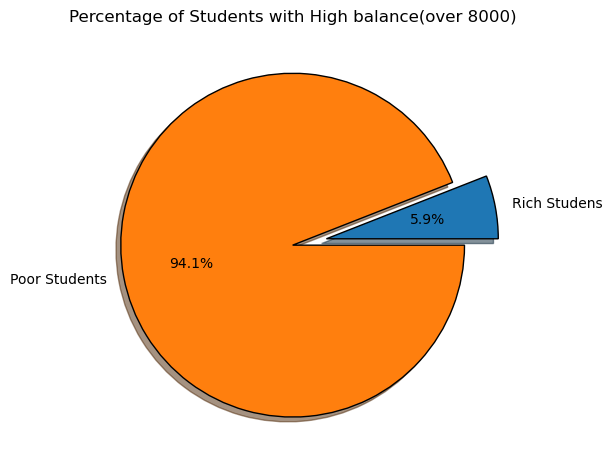

In [11]:
# creating a pie chat for Better visualization

plt.pie(x=[res,100-res],explode=[0.2,0],labels=("Rich Studens","Poor Students"),
       wedgeprops={"edgecolor":"black"},shadow=True,autopct="%1.1f%%")
plt.title('Percentage of Students with High balance(over 8000)')
plt.tight_layout()

plt.show()

### People with what job has a house the most ?

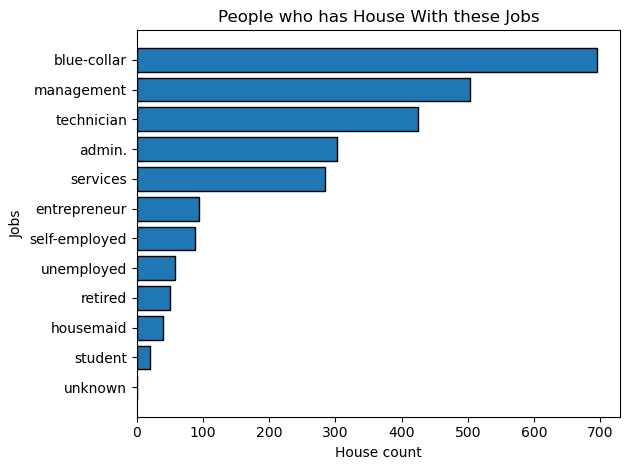

In [12]:
# Filltering Jobs and finding whether they have house or not
# And Creating bar chart to visualize 

ppl_with_house = df.groupby("job")["housing"].value_counts().loc[:,"yes"]
ppl_w_h = ppl_with_house.sort_values()
plt.barh(ppl_w_h.index,ppl_w_h,animated=True,edgecolor="black")
plt.title("People who has House With these Jobs")
plt.xlabel("House count")
plt.ylabel("Jobs")

plt.tight_layout()
plt.show()

### Show the amount of house owned with debt in marital Category
### What are the percentage for each one ?

In [13]:
# filtering house owners with loan and getting there Marital state

house_with_loan = df.groupby(["marital","loan"])['housing'].value_counts().loc[:,"yes","yes"]

divo = house_with_loan["divorced"]
mar = house_with_loan["married"]
single = house_with_loan["single"]

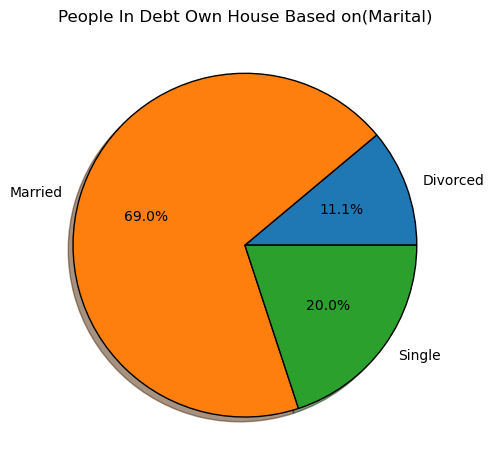

In [14]:
# creating pie chart for better visualization

plt.pie(x=[divo,mar,single],labels=["Divorced","Married","Single"],shadow=True,
        wedgeprops={"edgecolor":'black'},autopct="%1.1f%%")
plt.title("People In Debt Own House Based on(Marital)")

plt.tight_layout()
plt.show()

### Divide age into three Groups and get the average Balance for each one

In [15]:
# creating a Function to separate age groups by (young, middle age and old)
# adding new age group

def age(x):
    if x <=25:
        return "young"
    elif (x > 25) and (x <= 45):
        return "middle age"
    elif (x > 45) :
        return "old"
df["age_group"] = df["age"]
df["age_group"] = df["age_group"].apply(lambda x: age(x))

In [16]:
# filtering and getting the average balance for each age group

age_grp_avr = df.groupby("age_group")["balance"].mean()
age_grp_avr

age_group
middle age    1324.309321
old           1628.430115
young         1272.333333
Name: balance, dtype: float64

In [17]:
old = round(age_grp_avr["old"],2)
middle = round(age_grp_avr["middle age"],2)
young = round(age_grp_avr["young"],2)

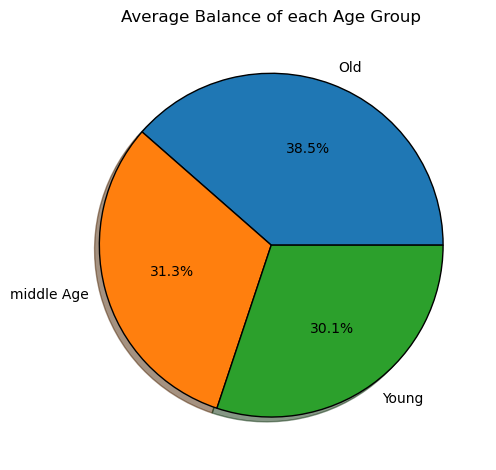

In [18]:
# creating pie chart 

plt.pie(x=[old,middle,young],labels=("Old","middle Age","Young"),
        wedgeprops={"edgecolor":"black"},shadow=True,autopct="%1.1f%%")

plt.title("Average Balance of each Age Group")

plt.tight_layout()
plt.show()